In [1]:
from starter import *
import pickle

%matplotlib inline

In [40]:
%ls

C:\sqlite\db\df_energy_forecast.db
Data_Cleaning.ipynb
EDA.ipynb
Users\kevinzhao\sqlite\db\df_energy_forecast.db
__pycache__/
create_sql.py
df.h5
df.p
holidays.csv
metadata.csv
metadata.p
starter.py
submission_format.csv
submission_frequency.csv
submission_frequency.p
train.csv
train.p
weather.csv
weather.p


## Load data

In [3]:
train = pd.read_csv('train.csv')
holidays = pd.read_csv('holidays.csv')
weather = pd.read_csv('weather.csv')
metadata = pd.read_csv('metadata.csv')
submission_format = pd.read_csv('submission_format.csv')

In [41]:
df = pickle.load(open('df.p', 'rb'))

## Exploratory data analysis

In [4]:
train.head(10)

,obs_id,SiteId,Timestamp,Value
0,744519,1,2014-09-03 00:00:00,9.096555e+05
1,7627564,1,2014-09-04 00:00:00,1.748273e+06
2,7034705,1,2014-09-05 00:00:00,NaN
3,5995486,1,2014-09-06 00:00:00,NaN
4,7326510,1,2014-09-07 00:00:00,NaN
5,3625268,1,2014-09-08 00:00:00,1.964878e+06
6,6038546,1,2014-09-09 00:00:00,3.266904e+06
7,4114748,1,2014-09-10 00:00:00,2.926094e+06
8,2572804,1,2014-09-11 00:00:00,1.720502e+06
9,2078763,1,2014-09-12 00:00:00,1.136248e+06


Some missing values for the train dataset

In [22]:
holidays.head()

,Unnamed: 0,Date,Holiday,SiteId
0,0,2016-01-01,New year,1
1,1,2016-01-18,"Birthday of Martin Luther King, Jr.",1
2,2,2016-02-15,Washington's Birthday,1
3,3,2016-05-30,Memorial Day,1
4,4,2016-07-04,Independence Day,1


In [6]:
holidays.Holiday.unique()

array(['New year', 'Birthday of Martin Luther King, Jr.',
       "Washington's Birthday", 'Memorial Day', 'Independence Day',
       'Labor Day', 'Election Day', 'Veterans Day', 'Thanksgiving Day',
       'Thanksgiving Friday', 'Christmas Eve (Observed)', 'Christmas Eve',
       'Christmas Day', 'Christmas Day (Observed)',
       'New Years Eve (Observed)', 'New Years Eve', 'New year (Observed)',
       'Veterans Day (Observed)', 'Christmas Eve shift',
       'New Years Eve Shift', 'Independence Day (Observed)',
       'Cesar Chavez Day', 'Robert E. Lee/Martin Luther King Birthday',
       'George Washington/Thomas Jefferson Birthday',
       'Confederate Memorial Day', 'Jefferson Davis Birthday',
       'Columbus Day / Fraternal Day / American Indian Heritage Day',
       'Good Friday', 'Primary Election Day', 'Columbus Day',
       'General Election Day', "Lincoln's Birthday",
       "Washington's Birthday (Observed)", 'West Virgina Day',
       'Election Day / Susan B. Anthony Day',

In [7]:
holidays.Holiday.nunique()

110

In [25]:
holidays.Holiday.value_counts().head(10)

New year                        707
Christmas Day                   707
Easter Monday                   652
All Saints Day                  523
Assumption of Mary to Heaven    521
Epiphany                        481
Immaculate Conception           473
Liberation Day                  467
International Workers' Day      462
Republic Day                    462
Name: Holiday, dtype: int64

There are quite a lot of holidays. Many of them are same but just worded differently.

In [26]:
weather.head(10)

,Unnamed: 0,Timestamp,Temperature,Distance,SiteId
0,78064,2013-12-31 19:00:00,-7.825,24.889929,1
1,86746,2013-12-31 19:00:00,-7.825,23.303097,1
2,90002,2013-12-31 19:00:00,-7.825,20.952256,1
3,90003,2013-12-31 19:00:00,-7.825,20.952256,1
4,100541,2013-12-31 19:34:00,-8.100,16.610602,1
5,100542,2013-12-31 19:55:00,-8.200,16.610602,1
6,78065,2013-12-31 20:00:00,-7.900,24.889929,1
7,90004,2013-12-31 20:00:00,-7.900,20.952256,1
8,100543,2013-12-31 20:15:00,-8.300,16.610602,1
9,100544,2013-12-31 20:35:00,-8.500,16.610602,1


In [33]:
weather.Temperature.isna().value_counts()

False    20017278
Name: Temperature, dtype: int64

The timestamps are not all even- weather is typically collected at different intervals. There are multiple sensors for some times.

In [35]:
metadata.head()

,SiteId,Surface,Sampling,BaseTemperature,MondayIsDayOff,TuesdayIsDayOff,WednesdayIsDayOff,ThursdayIsDayOff,FridayIsDayOff,SaturdayIsDayOff,SundayIsDayOff
0,1,1387.205119,15.0,18.0,False,False,False,False,False,True,True
1,2,6098.278376,30.0,18.0,False,False,False,False,False,True,True
2,3,10556.293605,5.0,18.0,False,False,False,False,False,True,False
3,5,12541.181277,30.0,18.0,False,False,False,False,False,True,True
4,6,9150.195373,30.0,18.0,False,False,False,False,False,True,True


Different buildings have different days off. The labels are `True` and `False` rather than 1 and 0.

In [9]:
weather_grouped = weather.groupby(by=['SiteId', 'Timestamp']).mean()

In [10]:
weather.loc[:,'Temperature'] = weather.apply(
    lambda row: weather_grouped.loc[(row['SiteId'],row['Timestamp']),'Temperature'], axis=1)

In [17]:
# pickle.dump(weather, open('weather.p','wb'))
weather = pickle.load(open('weather.p','rb'))

In [36]:
weather

,Unnamed: 0,Timestamp,Temperature,Distance,SiteId
0,78064,2013-12-31 19:00:00,-7.825000,24.889929,1
1,86746,2013-12-31 19:00:00,-7.825000,23.303097,1
2,90002,2013-12-31 19:00:00,-7.825000,20.952256,1
3,90003,2013-12-31 19:00:00,-7.825000,20.952256,1
4,100541,2013-12-31 19:34:00,-8.100000,16.610602,1
5,100542,2013-12-31 19:55:00,-8.200000,16.610602,1
6,78065,2013-12-31 20:00:00,-7.900000,24.889929,1
7,90004,2013-12-31 20:00:00,-7.900000,20.952256,1
8,100543,2013-12-31 20:15:00,-8.300000,16.610602,1
9,100544,2013-12-31 20:35:00,-8.500000,16.610602,1


Check distribution of temperature for different sites

(array([ 5.,  8., 21., 24., 33., 52., 61., 65., 57., 27.]),
 array([ 6. ,  7.9,  9.8, 11.7, 13.6, 15.5, 17.4, 19.3, 21.2, 23.1, 25. ]),
 <a list of 10 Patch objects>)

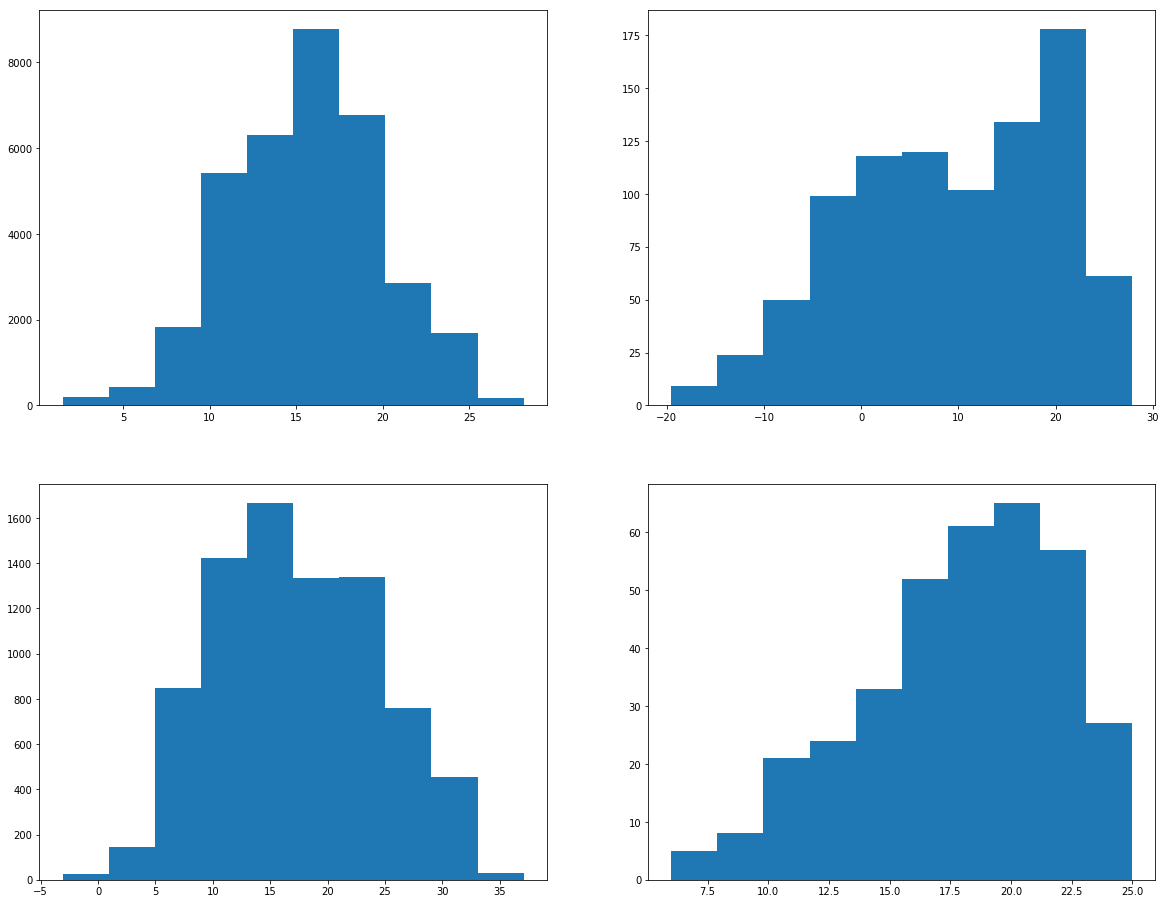

In [55]:
# plt.figure(figsize=(20,16))
plt.subplots(2,2,figsize=(20,16))
plt.subplot(221)
plt.hist(df[df.SiteId==2].Temperature.dropna())
plt.subplot(222)
plt.hist(df[df.SiteId==1].Temperature.dropna())
plt.subplot(223)
plt.hist(df[df.SiteId==50].Temperature.dropna())
plt.subplot(224)
plt.hist(df[df.SiteId==202].Temperature.dropna())